<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Linear_Regression_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Data Preparation and Sums

#This cell sets up the data using a Pandas DataFrame and
#calculates all the necessary sums required for the linear regression formulas.

import numpy as np
import pandas as pd

# Data from the user
hours_on_tv = [0, 1, 2, 3, 3, 5, 5, 5, 6, 7, 7, 10]
test_score = [99, 85, 82, 74, 95, 68, 76, 84, 58, 68, 75, 50]

# Create a DataFrame for structured calculations
df = pd.DataFrame({
    'Hours_on_TV': hours_on_tv,
    'Test_Score': test_score
})

# Calculate the number of data points (n)
n = len(df)

# Calculate the required columns for the formulas
df['x_squared'] = df['Hours_on_TV']**2
df['y_squared'] = df['Test_Score']**2
df['xy'] = df['Hours_on_TV'] * df['Test_Score']

# Calculate the sums of all columns
sum_x = df['Hours_on_TV'].sum()
sum_y = df['Test_Score'].sum()
sum_x_squared = df['x_squared'].sum()
sum_y_squared = df['y_squared'].sum()
sum_xy = df['xy'].sum()

# Display the calculated sums
print("--- Calculated Sums ---")
print(f"Number of data points (n): {n}")
print(f"Sum of x (Hours on TV): {sum_x}")
print(f"Sum of y (Test Score): {sum_y}")
print(f"Sum of x^2: {sum_x_squared}")
print(f"Sum of y^2: {sum_y_squared}")
print(f"Sum of xy: {sum_xy}")

--- Calculated Sums ---
Number of data points (n): 12
Sum of x (Hours on TV): 54
Sum of y (Test Score): 914
Sum of x^2: 332
Sum of y^2: 71820
Sum of xy: 3745


In [2]:
# Cell 2: Calculating Slope and Intercept

# This cell uses the sums from the previous cell to calculate the slope (B_1)
# and intercept (B_0) of the linear regression line.

# Formula for the slope (B1)
numerator_B1 = (n * sum_xy) - (sum_x * sum_y)
denominator_B1 = (n * sum_x_squared) - (sum_x)**2

# Check to avoid division by zero
if denominator_B1 == 0:
    print("Error: Denominator for B1 is zero. Cannot perform linear regression.")
else:
    # Calculate the slope and intercept
    b1 = numerator_B1 / denominator_B1

    # Formula for the intercept (B0)
    b0 = (sum_y / n) - b1 * (sum_x / n)

    # Display the regression parameters
    print("--- Regression Parameters ---")
    print(f"Slope (B1): {b1:.4f}")
    print(f"Intercept (B0): {b0:.4f}")

    # Display the linear regression equation
    print(f"Linear Regression Equation: y = {b0:.4f} + {b1:.4f}x")



--- Regression Parameters ---
Slope (B1): -4.1348
Intercept (B0): 94.7734
Linear Regression Equation: y = 94.7734 + -4.1348x


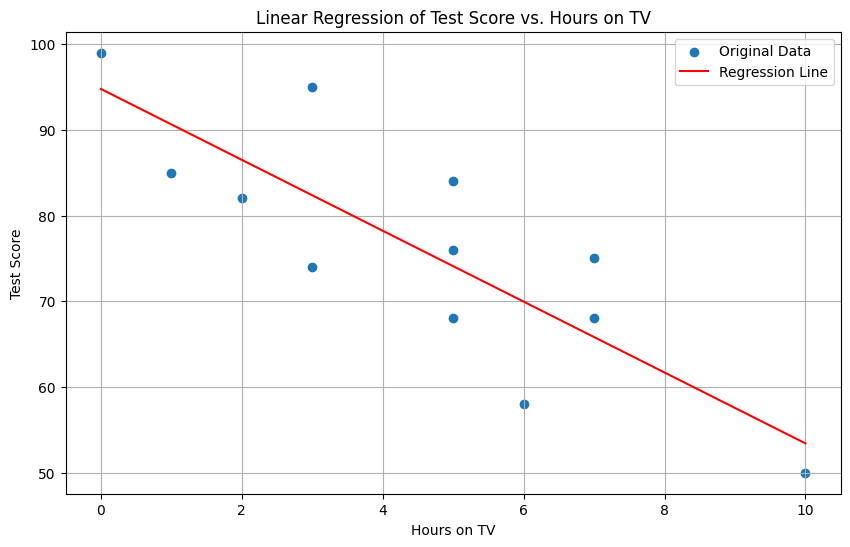

In [3]:
# Cell 3: Plotting the Regression Line

# cell 3 visualizes the data by creating a scatter plot of the original
 # data points and then overlays the calculated regression line.
import matplotlib.pyplot as plt

# Generate predicted y-values using the regression equation
y_pred = b0 + b1 * df['Hours_on_TV']

# Create a scatter plot of the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_on_TV'], df['Test_Score'], label='Original Data')
plt.plot(df['Hours_on_TV'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression of Test Score vs. Hours on TV')
plt.xlabel('Hours on TV')
plt.ylabel('Test Score')
plt.legend()
plt.grid(True)
plt.show()

Upto Cell 3 Simple Linear Regression is calculated as
it is...
In order to Understand the Tactics n Mechanics in this Mathematics
as well as Coding i am Breaking the concepts to Simpler Fragments so that
I can learn the Nitty Gritty behind it....

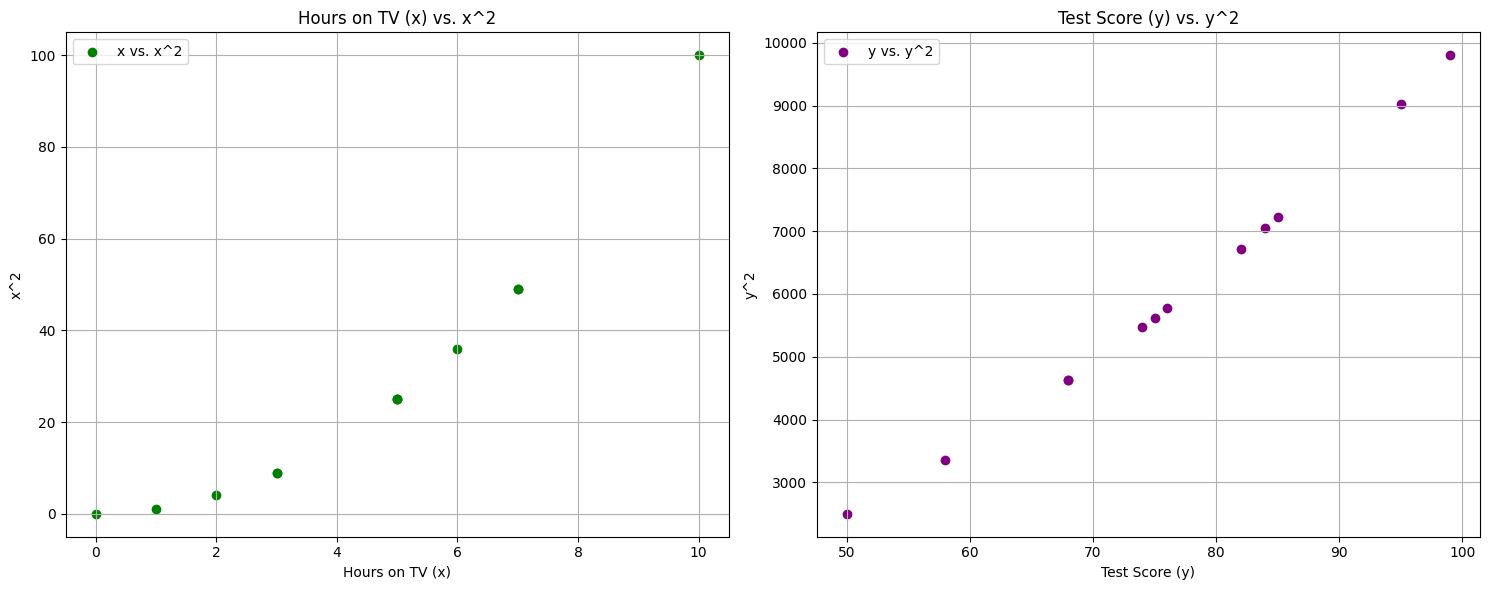

In [4]:
# Cell 4: Plotting the x^2 and y^2 Relationship
# This cell visualizes two of the columns created for our calculations: x^2 and y^2.
# While not a standard plot for linear regression, it helps demonstrate the intermediate data transformations.
# Plotting these squared values against the original x and y gives a different perspective on the data.
# For instance, plotting x^2 vs. x shows a parabolic curve, which is expected. 📉
# Create subplots to show x^2 vs x and y^2 vs y
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Hours on TV (x) vs. its squared value (x^2)
ax1.scatter(df['Hours_on_TV'], df['x_squared'], color='green', label='x vs. x^2')
ax1.set_title('Hours on TV (x) vs. x^2')
ax1.set_xlabel('Hours on TV (x)')
ax1.set_ylabel('x^2')
ax1.legend()
ax1.grid(True)

# Plot Test Score (y) vs. its squared value (y^2)
ax2.scatter(df['Test_Score'], df['y_squared'], color='purple', label='y vs. y^2')
ax2.set_title('Test Score (y) vs. y^2')
ax2.set_xlabel('Test Score (y)')
ax2.set_ylabel('y^2')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


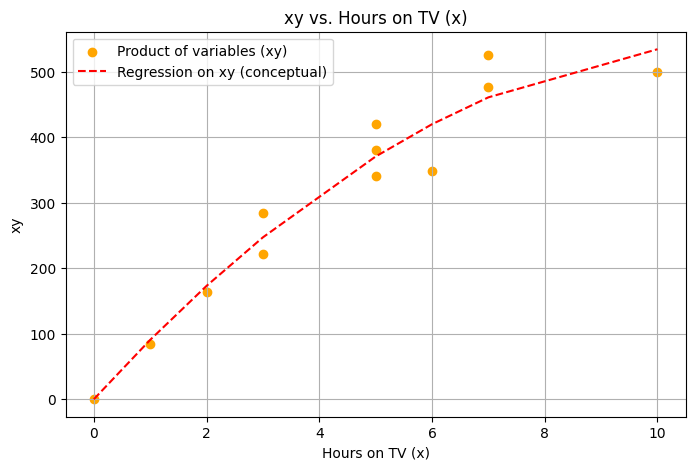

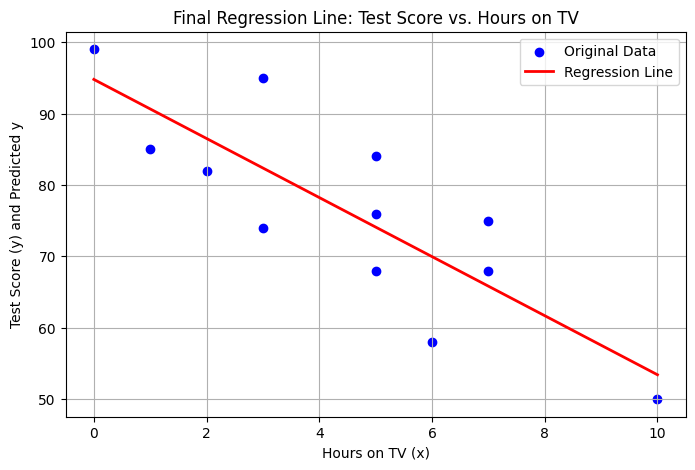

In [5]:
# Cell 5: Plotting the xy and Regression Line

# This final cell puts it all together. First, it plots the product of the
# variables (xy) against one of the original variables (x). This gives a visual sense of the covariance.
# Then, the most crucial part of linear regression is displayed:
 # the regression line. This line represents our model and shows the best-fit trend,
# allowing us to visually see how well the model captures the relationship between hours on TV and test scores. 🚀

# Plot the product of variables (xy) vs. x
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_on_TV'], df['xy'], color='orange', label='Product of variables (xy)')
plt.plot(df['Hours_on_TV'], b0*df['Hours_on_TV'] + b1*df['x_squared'], color='red', linestyle='--', label='Regression on xy (conceptual)')
plt.title('xy vs. Hours on TV (x)')
plt.xlabel('Hours on TV (x)')
plt.ylabel('xy')
plt.legend()
plt.grid(True)
plt.show()

# Now, plot the final regression line with the original data for clarity
y_pred = b0 + b1 * df['Hours_on_TV']

plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_on_TV'], df['Test_Score'], color='blue', label='Original Data')
plt.plot(df['Hours_on_TV'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Final Regression Line: Test Score vs. Hours on TV')
plt.xlabel('Hours on TV (x)')
plt.ylabel('Test Score (y) and Predicted y')
plt.legend()
plt.grid(True)
plt.show()